## Observations and Insights

## Dependencies and starter code

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata

# Combine the data into a single dataset
combined_mouse_df = pd.merge(study_results, mouse_metadata,how='outer', on='Mouse ID')
combined_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [17]:
#combined_mouse_df.describe()
#Summary_Stats = combined_mouse_df
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Tumor_Stats = combined_mouse_df.groupby(["Drug Regimen"])



In [18]:
Tumor_mean = Tumor_Stats["Tumor Volume (mm3)"].mean()
Tumor_median = Tumor_Stats["Tumor Volume (mm3)"].median()
Tumor_var = Tumor_Stats["Tumor Volume (mm3)"].var()
Tumor_Std = Tumor_Stats["Tumor Volume (mm3)"].std()
Tumor_std_err = Tumor_Stats["Tumor Volume (mm3)"].sem()

Summary_Stats = pd.DataFrame({"Mean Tumor Volume":Tumor_mean,"Median Tumor Volume":Tumor_median,
                              "Tumor Volume Variance":Tumor_var,"Tumor Volume Std. Dev.":Tumor_Std,
                              "Tumor Volume Std. Err.":Tumor_std_err})
Summary_Stats





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

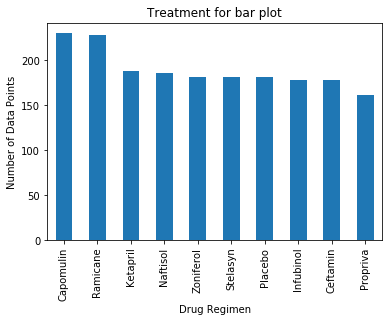

In [19]:
#Count Treatment for bar plot using pandas
regcount = combined_mouse_df["Drug Regimen"].value_counts().plot(kind = "bar")
regcount.set_xlabel("Drug Regimen")
regcount.set_ylabel("Number of Data Points")
plt.title("Treatment for bar plot")

regcount

Text(0.5, 1.0, 'Treatment for bar plot')

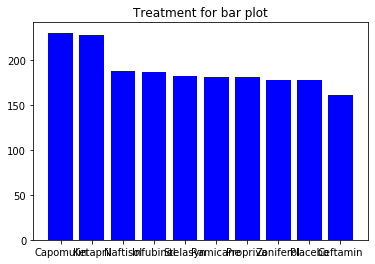

In [20]:
#Generate bar plot using matplotlib

unique_regiment = combined_mouse_df["Drug Regimen"].unique()
number_data_point = combined_mouse_df["Drug Regimen"].value_counts()

plt.bar(unique_regiment, number_data_point, color = "blue", align = "center")
plt.title("Treatment for bar plot")

## Pie plots

Text(0.5, 1.0, 'Distribution of female versus male mice')

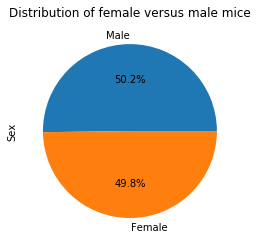

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pieplot_using_pandas = mouse_metadata["Sex"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")

plt.title("Distribution of female versus male mice")

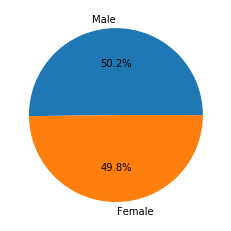

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#unique #count #plot
sex_unique = mouse_metadata["Sex"].unique()
#count of sex use value_counts
sex_count = mouse_metadata["Sex"].value_counts()
#Pie chart with using matplotlib
plt.pie(sex_count, labels=sex_unique, autopct='%1.1f%%')
plt.show()


## Quartiles, outliers and boxplots

([<matplotlib.axis.XTick at 0x2160cc42688>,
 <a list of 4 Text xticklabel objects>)

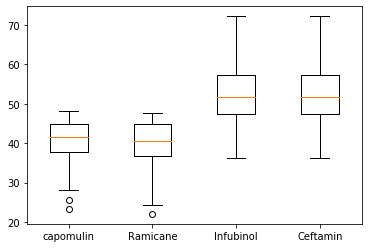

In [23]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

capomulin = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin", ["Drug Regimen", "Tumor Volume (mm3)"]]
Ramicane = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Ramicane", ["Drug Regimen", "Tumor Volume (mm3)"]]
Infubinol = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Infubinol", ["Drug Regimen", "Tumor Volume (mm3)"]]
Ceftamin = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Infubinol", ["Drug Regimen", "Tumor Volume (mm3)"]]

plt.boxplot([capomulin["Tumor Volume (mm3)"],Ramicane["Tumor Volume (mm3)"],Infubinol["Tumor Volume (mm3)"],Ceftamin["Tumor Volume (mm3)"]])
plt.xticks([1,2,3,4],["capomulin","Ramicane","Infubinol","Ceftamin"])

## Line and scatter plots

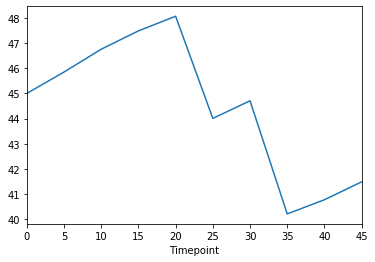

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#conditional statement to look in Drug Reg to find Capomulin in Mouse ID and give the volume
Treatment_plot = combined_mouse_df.loc[(combined_mouse_df["Drug Regimen"] == "Capomulin") & (combined_mouse_df["Mouse ID"] == "l509"),["Timepoint", "Tumor Volume (mm3)"]]
Treatment_plot.set_index("Timepoint")["Tumor Volume (mm3)"].plot()


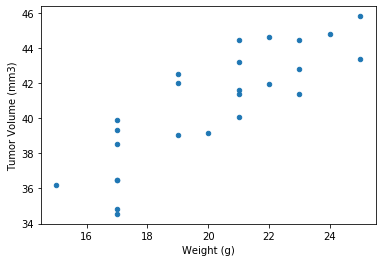

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


scatter_plot_weight = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin", ["Weight (g)", "Mouse ID", "Tumor Volume (mm3)"]]
grouped_scatter_plot_weight = scatter_plot_weight.groupby("Mouse ID").mean()
grouped_scatter_plot_weight.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)")

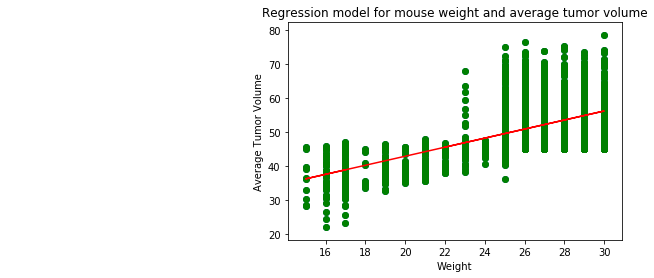

In [29]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


x_values = combined_mouse_df["Weight (g)"]
y_values = combined_mouse_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="blue")
plt.scatter(x_values,y_values,color='green')
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Regression model for mouse weight and average tumor volume")
plt.show()
